## import module__

In [155]:
import pylab as pl
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.optimize as opt
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import randint
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

## dataframe__

In [156]:
ha_df = pd.read_csv('heart.csv')
ha_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## data understanding__

In [157]:
ha_df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

### all columns explanation 🩺🩻🩸.
* <b>age</b>: age of the patient

* <b>sex</b> : sex of the patient

* <b>cp</b> : chest pain type <br>
0 = typical angina <br>
1 = atypical angina<br>
2 = non-anginal pain<br>
3 = asymptomatic

* <b>trtbps</b> : resting blood pressure (in mm Hg)

* <b>chol</b> : cholestoral in mg/dl fetched via BMI sensor

* <b>fbs</b> : fasting blood sugar > 120 mg/dl <br>
1 = true <br>
0 = false

* <b>restecg</b> : resting electrocardiographic results <br>
0 = normal <br>
1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br>
2 = showing probable or definite left ventricular hypertrophy by Estes' criteria

* <b>thalachh</b> : maximum heart rate achieved

* <b>exng</b> : exercise induced angina <br> 
1 = yes <br>
0 = no

* <b>Oldpeak</b>: oldpeak = ST [Numeric value measured in depression]

* <b>slp</b> : slope,the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

* <b>caa</b> : number of major vessels

* <b>thall</b> : thalium stress test result

* <b>output</b> : <br>
0 = less chance of heart attack <br>
1 = more chance of heart attack

## data preparation__

In [158]:
# value checking
ha_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [159]:
# from the data understanding we got
categoric_cols = ['sex', 'cp', 'fbs', 'restecg', 
                  'exng', 'slp', 'caa', 'thall']

In [160]:
for i in categoric_cols:
     print('all value in column {0} : \n{1}'.format(i, ha_df[i].value_counts().sort_index()))
     print('\n')

all value in column sex : 
sex
0     96
1    207
Name: count, dtype: int64


all value in column cp : 
cp
0    143
1     50
2     87
3     23
Name: count, dtype: int64


all value in column fbs : 
fbs
0    258
1     45
Name: count, dtype: int64


all value in column restecg : 
restecg
0    147
1    152
2      4
Name: count, dtype: int64


all value in column exng : 
exng
0    204
1     99
Name: count, dtype: int64


all value in column slp : 
slp
0     21
1    140
2    142
Name: count, dtype: int64


all value in column caa : 
caa
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64


all value in column thall : 
thall
0      2
1     18
2    166
3    117
Name: count, dtype: int64




### outliers

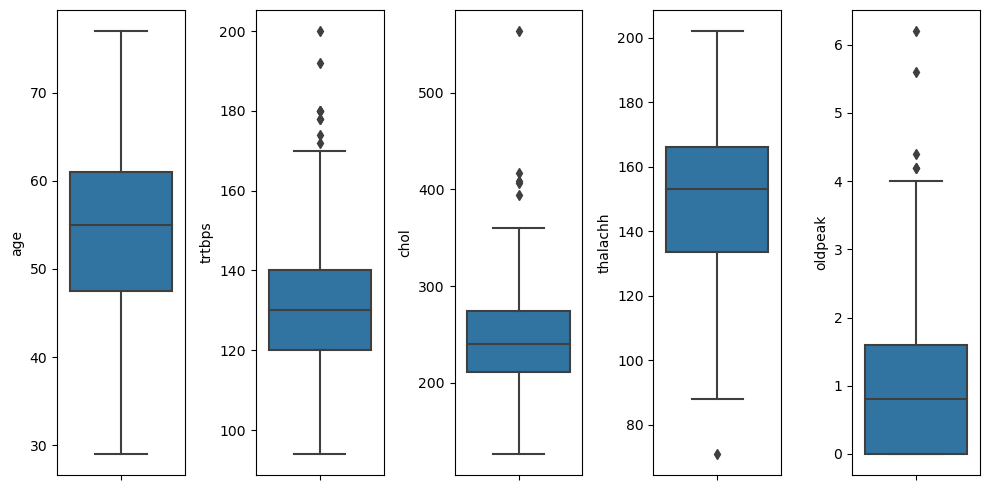

In [161]:
col_num = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y=ha_df[col_num[i]])
    plt.tight_layout()

In [162]:
for i in col_num:
    Q1 = ha_df[i].quantile(0.25) 
    Q3 = ha_df[i].quantile(0.75)
    IQR = Q3-Q1 
    LowerBound = Q1 - (1.5 * IQR) 
    UpperBound = Q3 + (1.5 * IQR) 
    
    ha_df = ha_df[(ha_df[i] >= LowerBound)&(ha_df[i] <= UpperBound)]

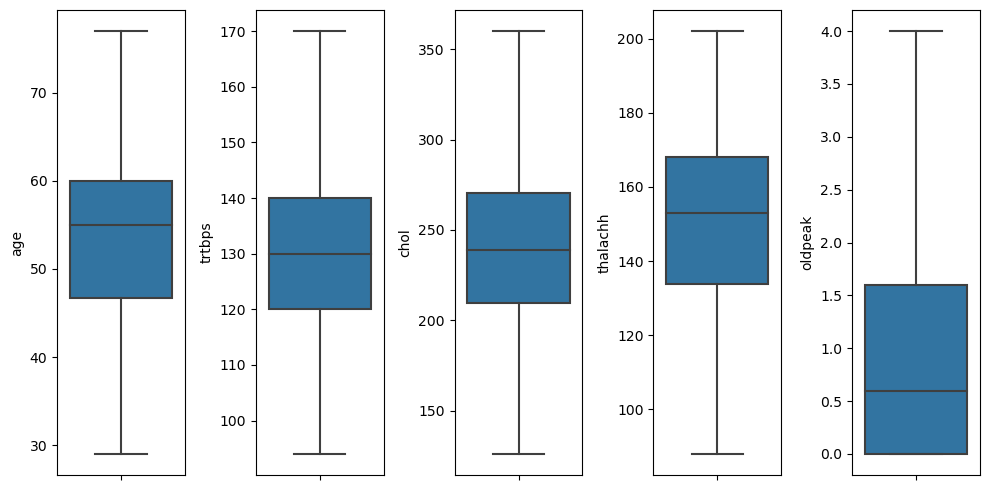

In [163]:
col_num = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y = ha_df[col_num[i]])
    plt.tight_layout()

In [164]:
ha_df.shape

(284, 14)

### missing value

In [165]:
ha_df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### duplicate data

In [166]:
ha_df.duplicated().sum()

1

In [167]:
ha_df = ha_df.drop_duplicates()

In [168]:
ha_df.duplicated().sum()

0

## exploratory data analysis__

In [169]:
ha_df[col_num].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,283.0,54.049470,9.128186,29.0,47.0,55.0,60.0,77.0
trtbps,283.0,129.883392,15.387795,94.0,120.0,130.0,140.0,170.0
chol,283.0,242.314488,44.654188,126.0,210.5,239.0,270.5,360.0
thalachh,283.0,149.961131,22.691625,88.0,133.5,153.0,168.0,202.0
oldpeak,283.0,0.951943,1.026400,0.0,0.0,0.6,1.6,4.0


In [170]:
df = ha_df

In [171]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

### count plot

In [172]:
count = ['sex', 'cp', 'fbs', 'restecg','exng','slp', 'caa', 'thall', 'output']

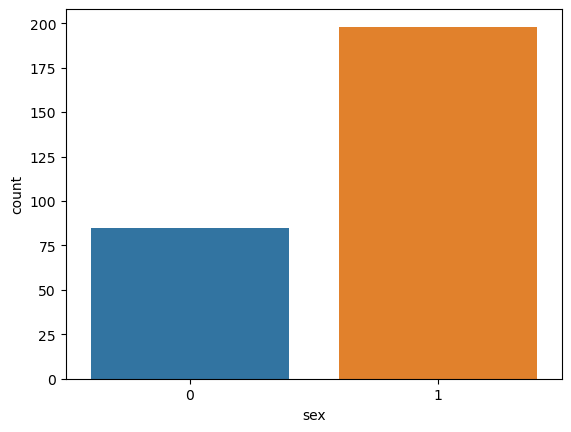

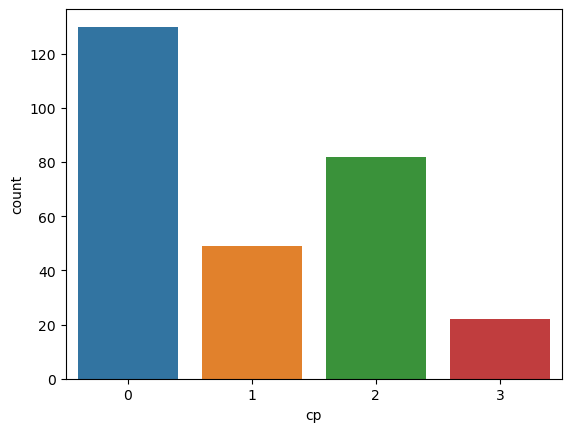

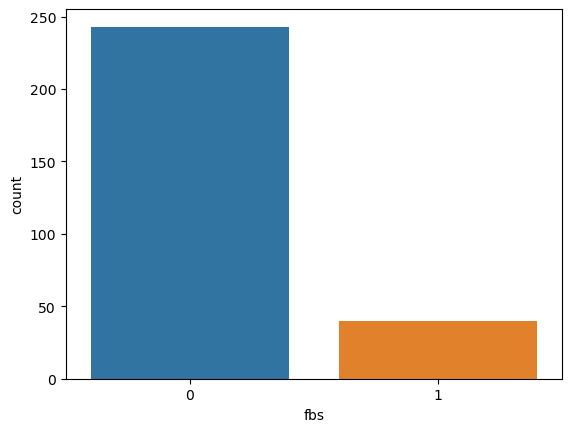

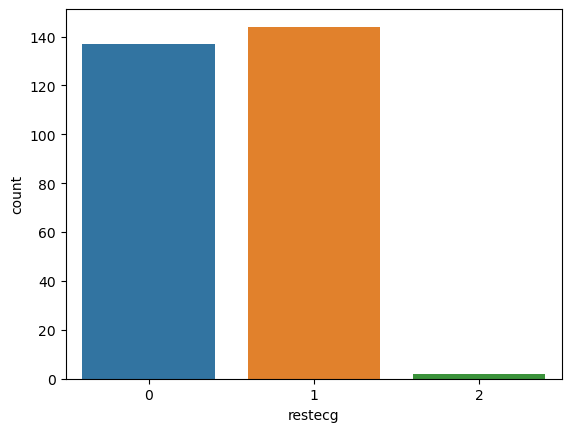

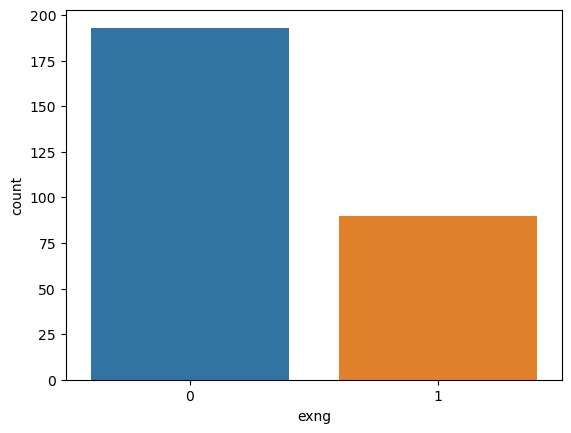

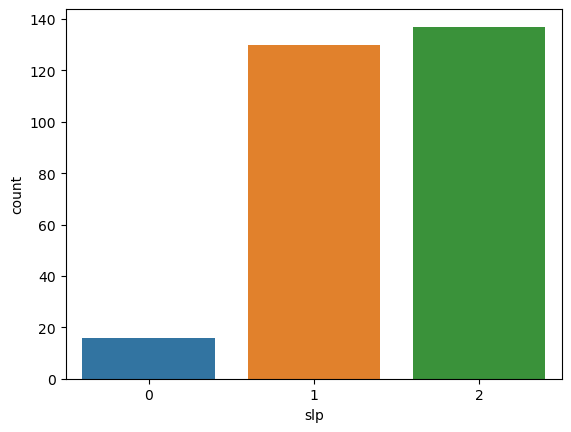

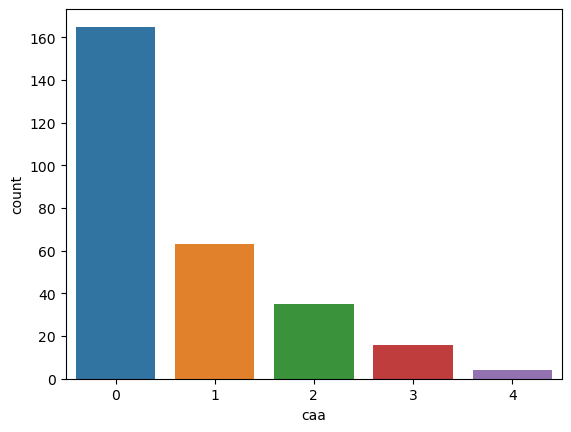

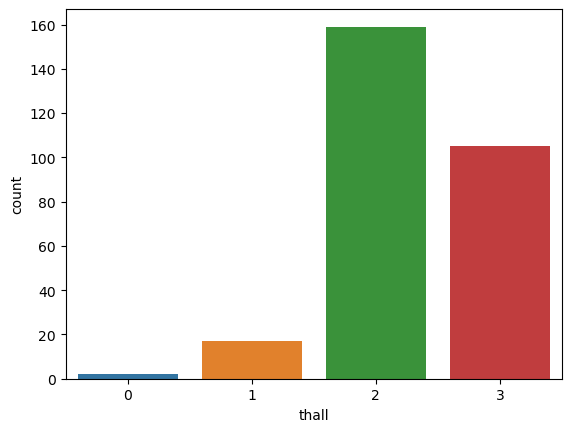

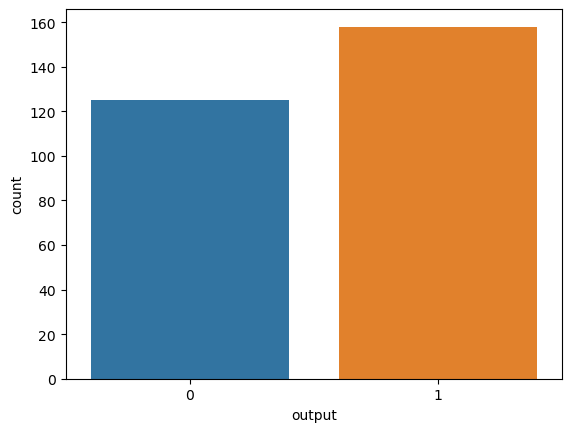

In [173]:
for i in count:
    sns.countplot(x = i, data = df)
    plt.show()    

### histogram

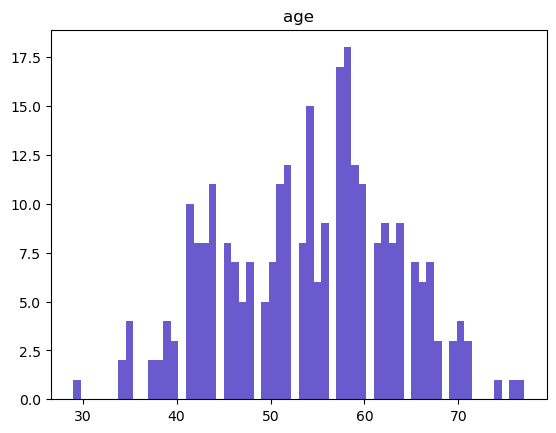

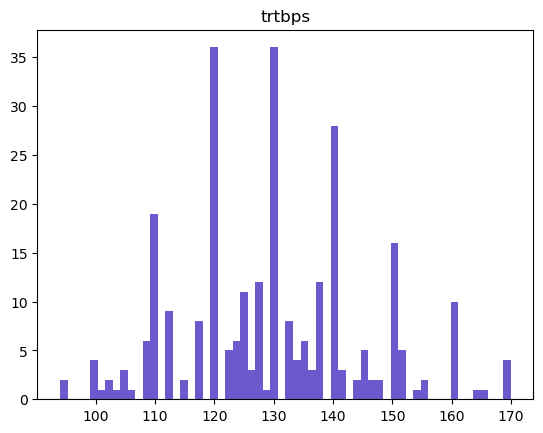

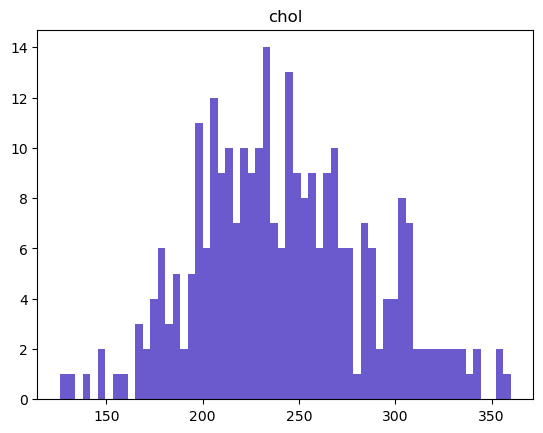

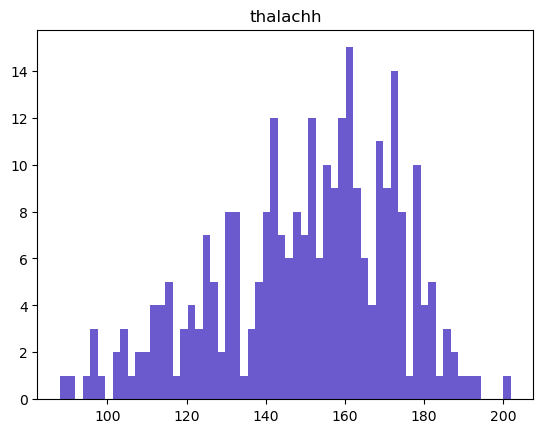

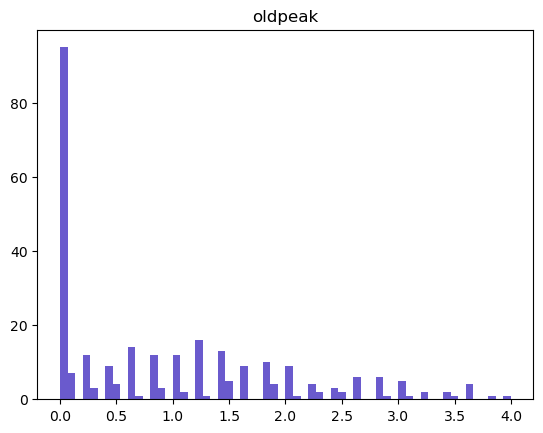

In [174]:
i = ['age', 'trtbps', 'chol','thalachh','oldpeak']
for j in i:
    plt.hist(df[j],bins = 60, color = 'slateblue')
    plt.title(j)
    plt.show()

## checking for multicollinearity__ / featureselection

In [175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
3,trtbps,67.479395
7,thalachh,49.071486
0,age,41.433818
4,chol,32.397241
12,thall,17.597185
10,slp,10.237501
13,output,4.558433
1,sex,4.022971
9,oldpeak,2.998900
2,cp,2.615809


In [176]:
# drop column 'trtbps' (vif > 11)
df.drop(columns = ['trtbps'], inplace = True)

In [177]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
6,thalachh,40.229316
3,chol,31.225076
0,age,29.612135
11,thall,17.532569
9,slp,10.231212
12,output,4.558241
1,sex,4.001104
8,oldpeak,2.941578
2,cp,2.596913
5,restecg,2.164959


In [178]:
# drop column 'thalachh' (vif > 11)
df.drop(columns = ['thalachh'], inplace = True)

In [179]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
0,age,28.887183
3,chol,26.287462
10,thall,16.339419
8,slp,9.095234
11,output,4.045895
1,sex,3.765843
7,oldpeak,2.912625
2,cp,2.553355
5,restecg,2.148942
6,exng,2.016190


In [180]:
# drop column 'age' (vif > 11)
df.drop(columns = ['age'], inplace = True)

In [181]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
2,chol,17.937794
9,thall,15.369374
7,slp,8.911986
10,output,3.937079
0,sex,3.762219
6,oldpeak,2.713075
1,cp,2.532267
4,restecg,2.144378
5,exng,2.007930
8,caa,1.853003


In [182]:
# drop column 'chol' (vif > 11)
df.drop(columns = ['chol'], inplace = True)

In [183]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
8,thall,10.628714
6,slp,7.524873
0,sex,3.757474
9,output,3.713174
5,oldpeak,2.557867
1,cp,2.512613
3,restecg,2.135752
4,exng,1.946123
7,caa,1.828787
2,fbs,1.220503


In [184]:
df.columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exng', 'oldpeak', 'slp', 'caa', 'thall',
       'output'],
      dtype='object')

Pearson Correlation,


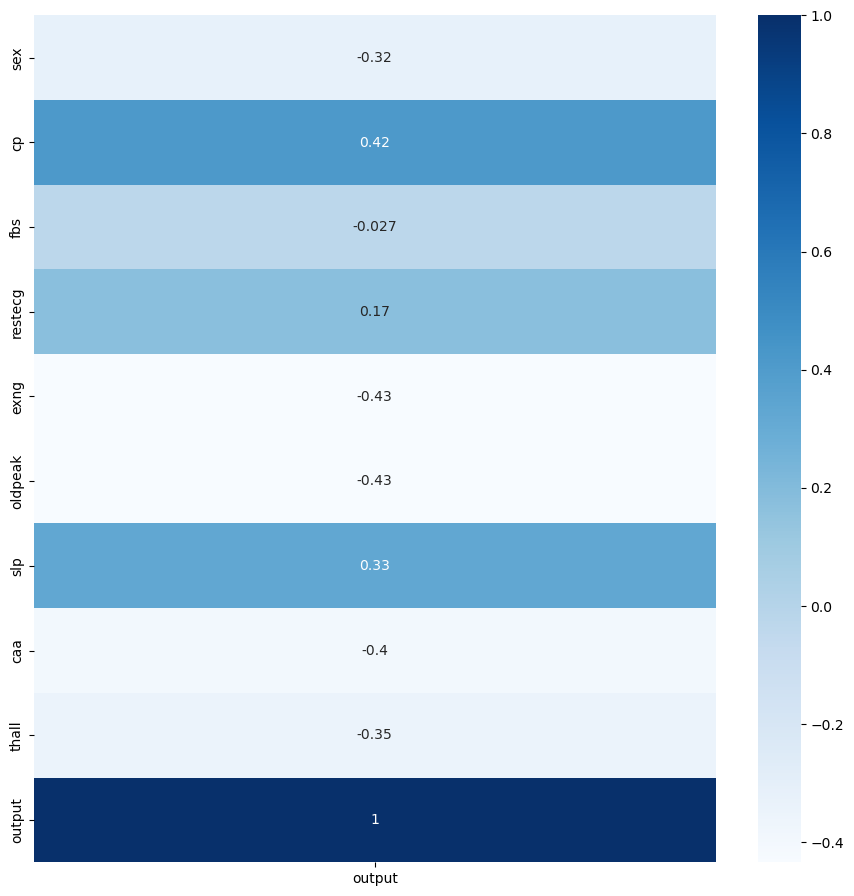

abs corr score: 
sex        0.318896
cp         0.416319
fbs        0.027210
restecg    0.171453
exng       0.431599
oldpeak    0.434108
slp        0.326473
caa        0.397733
thall      0.349150
Name: output, dtype: float64


mean 0.31921551302804485


feature selection result: 
cp         0.416319
exng       0.431599
oldpeak    0.434108
slp        0.326473
caa        0.397733
thall      0.349150
Name: output, dtype: float64


In [185]:
print('Pearson Correlation,')
plt.figure(figsize = (11,11))
cor = df.corr().iloc[:,-1:]
sns.heatmap(cor, annot = True, cmap = plt.cm.Blues)
plt.show()

print('abs corr score: ')
print(abs(cor['output'][0:-1]))
cor['output'] = cor['output'][0:-1]
margin = abs(cor['output'][0:-1]).mean()

print('\n')

print('mean {0}'.format(margin))

print('\n')

print('feature selection result: ')
fs = abs(cor['output'][0:-1])[abs(cor['output']) > margin]
print(fs)

In [186]:
df = df.drop(columns = ['sex', 'fbs', 'restecg', 'slp'])

In [187]:
df.columns

Index(['cp', 'exng', 'oldpeak', 'caa', 'thall', 'output'], dtype='object')

In [188]:
df.head()

,cp,exng,oldpeak,caa,thall,output
0,3,0,2.3,0,1,1
1,2,0,3.5,0,2,1
2,1,0,1.4,0,2,1
3,1,0,0.8,0,2,1
4,0,1,0.6,0,2,1


## train test split__

In [189]:
X = df.drop(columns=['output'])
y = df['output']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## hypertuning__

In [190]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


model_params = {
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params' : {
            'penalty':['l1', 'l2', 'elasticnet', 'none'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class': ['auto', 'ovr', 'multinomial'],
        }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'splitter':['best','random'],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [4,5,6,7,8],
            'criterion' :['gini', 'entropy']
        }
    },
    'SVM_Classifier':{
        'model' : SVC(),
        'params':{
            'kernel' : ['rbf','poly','sigmoid','linear'],
            'gamma' : ['scale','auto'],
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [200, 500],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [4,5,6,7,8],
            'criterion' :['gini', 'entropy']
        }
    }
    
    }
scores = []

from sklearn.model_selection import GridSearchCV
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train,y_train) 
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
best = pd.DataFrame(scores,columns=['model','best_score','best_params'])
best

,model,best_score,best_params
0,Logistic_Regression,0.832047,"{'multi_class': 'auto', 'penalty': 'l1', 'solv..."
1,decision_tree,0.814444,"{'criterion': 'entropy', 'max_depth': 6, 'max_..."
2,SVM_Classifier,0.845205,"{'gamma': 'auto', 'kernel': 'rbf'}"
3,RandomForestClassifier,0.836316,"{'criterion': 'entropy', 'max_depth': 4, 'max_..."


## modelling__

### 1 Logistic Regression

In [191]:
model_name = best.model[0]
best.best_params[0]

{'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}

In [192]:
model = LogisticRegression(solver = 'saga',
                           penalty = 'l1', 
                           multi_class = 'auto')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

### evaluation

[[23  4]
 [ 3 27]]


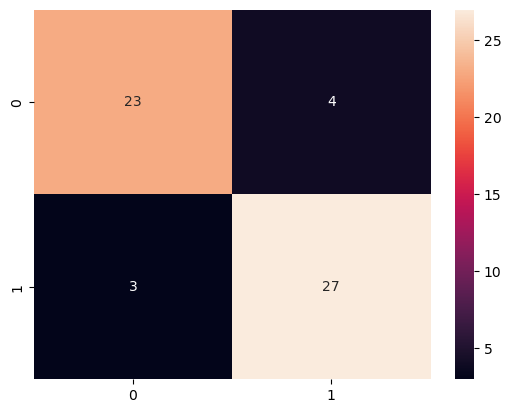



Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.87      0.90      0.89        30

    accuracy                           0.88        57
   macro avg       0.88      0.88      0.88        57
weighted avg       0.88      0.88      0.88        57



In [193]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
print(confusion_matrix(y_test, y_predict))

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)
plt.show()

from sklearn.metrics import classification_report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_predict))


model_score = []
scores = score(y_test, y_predict,average='macro')
model_score.append({'model'     : model_name,
                    'best_score': best.best_score[0],
                    'f1_score'  : scores[0], 
                    'precision' : scores[1], 
                    'recall'    : scores[2]
                   
                   })

### 2 Decision Tree

In [194]:
model_name = best.model[1]
best.best_params[1]

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'splitter': 'best'}

In [195]:
model = DecisionTreeClassifier(criterion = 'gini',
                               max_depth = 5,
                               max_features = 'log2',
                               splitter = 'best')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

### evaluation

[[22  5]
 [ 5 25]]


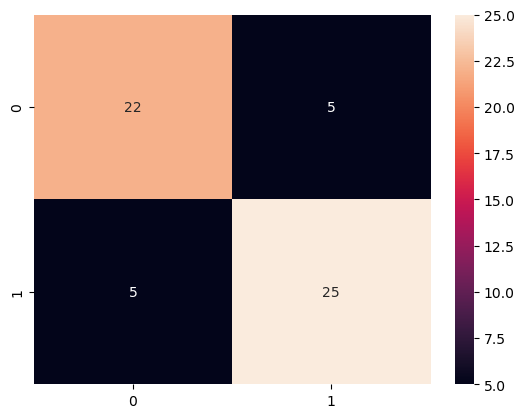



Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.83      0.83      0.83        30

    accuracy                           0.82        57
   macro avg       0.82      0.82      0.82        57
weighted avg       0.82      0.82      0.82        57



In [196]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)
plt.show()

from sklearn.metrics import classification_report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_predict))

scores = score(y_test, y_predict,average='macro')
model_score.append({'model'     : model_name,
                    'best_score': best.best_score[1],
                    'f1_score'  : scores[0], 
                    'precision' : scores[1], 
                    'recall'    : scores[2]
                   
                   })

### 3 SVM

In [197]:
model_name = best.model[2]
best.best_params[2]

{'gamma': 'auto', 'kernel': 'rbf'}

In [198]:
model = SVC(gamma = 'auto', kernel = 'rbf')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

### evaluation

[[20  7]
 [ 2 28]]


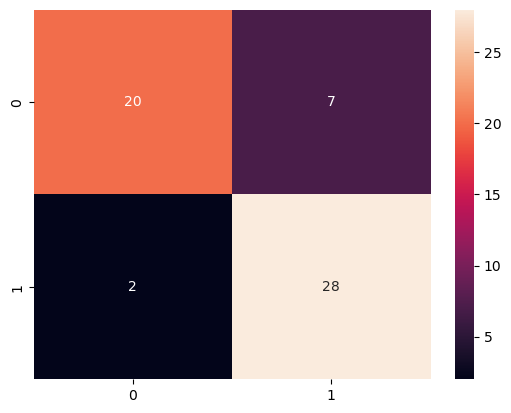



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82        27
           1       0.80      0.93      0.86        30

    accuracy                           0.84        57
   macro avg       0.85      0.84      0.84        57
weighted avg       0.85      0.84      0.84        57



In [199]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)
plt.show()

from sklearn.metrics import classification_report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_predict))

scores = score(y_test, y_predict,average='macro')
model_score.append({'model'     : model_name,
                    'best_score': best.best_score[2],
                    'f1_score'  : scores[0], 
                    'precision' : scores[1], 
                    'recall'    : scores[2]
                   
                   })

### 4 Random Forest

In [200]:
model_name = best.model[3]
best.best_params[3]

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'n_estimators': 200}

In [201]:
model = RandomForestClassifier(criterion= 'entropy',
                               max_depth= 4,
                               max_features= 'log2',
                               n_estimators= 500)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

### evaluation

[[21  6]
 [ 2 28]]


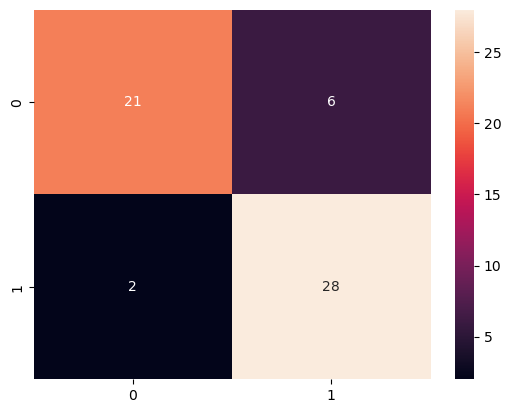



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.82      0.93      0.88        30

    accuracy                           0.86        57
   macro avg       0.87      0.86      0.86        57
weighted avg       0.87      0.86      0.86        57



In [202]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)
plt.show()

from sklearn.metrics import classification_report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_predict))

scores = score(y_test, y_predict,average='macro')
model_score.append({'model'     : model_name,
                    'best_score': best.best_score[3],
                    'f1_score'  : scores[0], 
                    'precision' : scores[1], 
                    'recall'    : scores[2]
                   
                   })

### Comparing Model Performance

In [203]:
performance_df = pd.DataFrame(model_score)
performance_df

,model,best_score,f1_score,precision,recall
0,Logistic_Regression,0.832047,0.877792,0.875926,0.876585
1,decision_tree,0.814444,0.824074,0.824074,0.824074
2,SVM_Classifier,0.845205,0.854545,0.837037,0.838932
3,RandomForestClassifier,0.836316,0.868286,0.855556,0.857500


                    model  best_score  f1_score  precision    recall
0     Logistic_Regression    0.832047  0.877792   0.875926  0.876585
1           decision_tree    0.814444  0.824074   0.824074  0.824074
2          SVM_Classifier    0.845205  0.854545   0.837037  0.838932
3  RandomForestClassifier    0.836316  0.868286   0.855556  0.857500


Text(0.5, 1.0, 'Model Performance (Macro)')

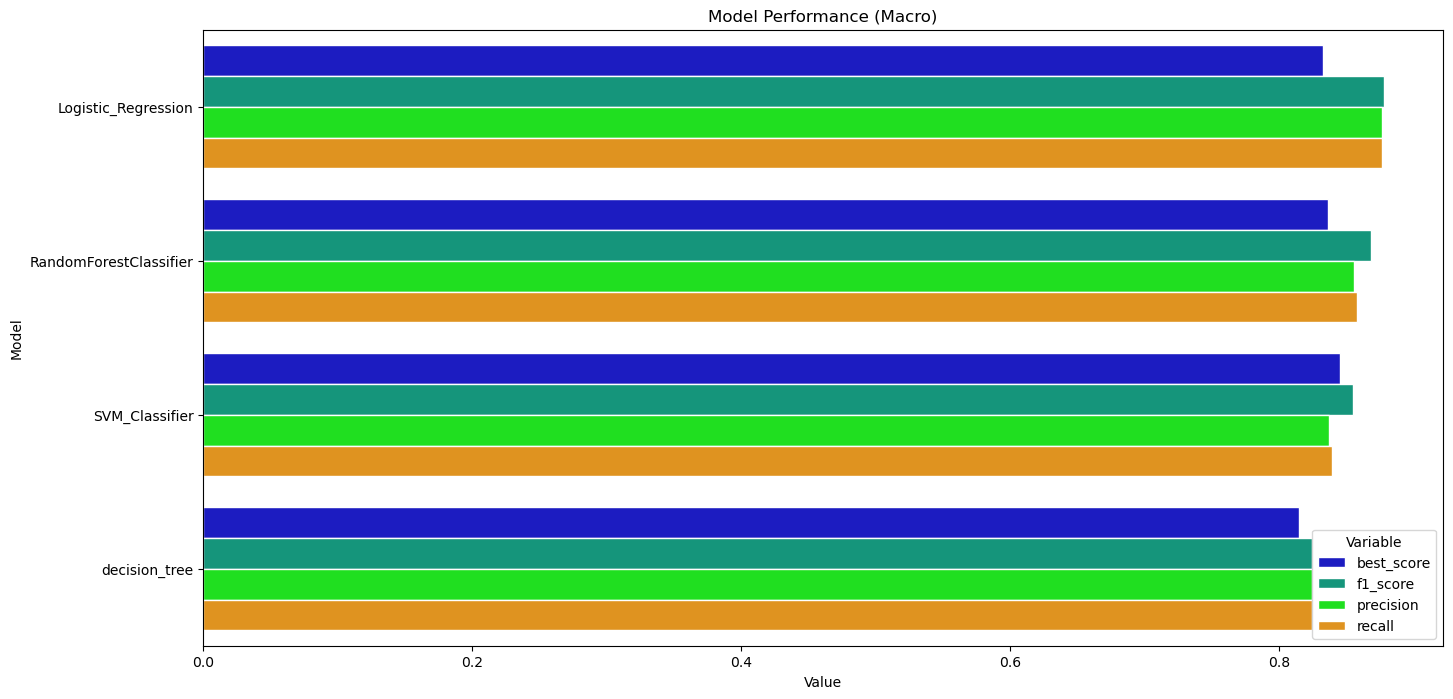

In [204]:
print(performance_df)

# sort the prediction values
performance_df = performance_df.sort_values('model')

# create the barchart grouped by model
fig, ax = plt.subplots(figsize=(16, 8))
tidy = performance_df.melt(id_vars='model').rename(columns=str.title)
tidy
sns.barplot(y='Model', x='Value', hue='Variable', data=tidy, ax=ax, palette='nipy_spectral', linewidth=1, edgecolor="w")
plt.title('Model Performance (Macro)')

## Feature Importance

In [205]:
# Random Forests in sklearn will automatically calculate feature importance
importances = model.feature_importances_
# We can sort the features by their importance
sorted(zip(model.feature_importances_, X.columns), reverse=True)

[(0.25324730419024133, 'thall'),
 (0.23251393139671334, 'cp'),
 (0.21358156892680766, 'oldpeak'),
 (0.19273763985504205, 'caa'),
 (0.10791955563119557, 'exng')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

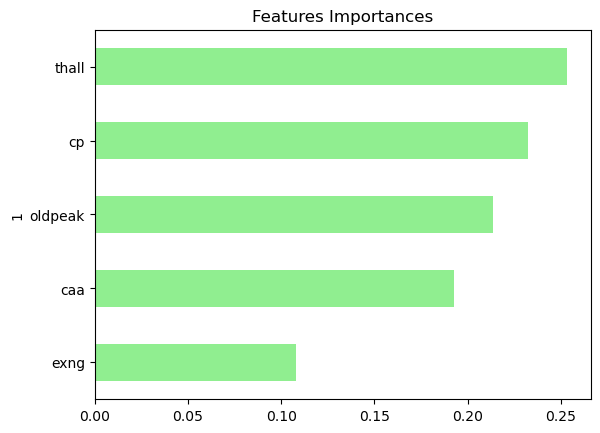

In [206]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)